<a href="https://colab.research.google.com/github/ThisaraS97/Detect_tourist_places/blob/main/Detect_tourist_places.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
size=224
train_path = '/content/drive/MyDrive/Smart_Travel/tourist_places'
valid_path = '/content/drive/MyDrive/Smart_Travel/tourist_places'

In [ ]:
%cd '/content/drive/MyDrive/Smart_Travel/tourist_places'

/content/drive/MyDrive/Smart_Travel/tourist_places


In [ ]:
resnet = ResNet50(input_shape=[size,size] + [3], weights='imagenet', include_top=False)

94765736/94765736 [==============================] - 4s 0us/step


In [ ]:
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
folders = glob(train_path+'/*')

In [ ]:
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

In [ ]:
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 112, 112, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                          

In [ ]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (size, size),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 101 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = (size, size),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 101 images belonging to 10 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-17-b638fdf3caf0>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/40
4/4 [==============================] - 99s 30s/step - loss: 16.0532 - accuracy: 0.1782 - val_loss: 8.7503 - val_accuracy: 0.1485
Epoch 2/40
4/4 [==============================] - 64s 18s/step - loss: 9.7234 - accuracy: 0.1485 - val_loss: 10.8445 - val_accuracy: 0.1485
Epoch 3/40
4/4 [==============================] - 63s 18s/step - loss: 11.4077 - accuracy: 0.1089 - val_loss: 9.8042 - val_accuracy: 0.1584
Epoch 4/40
4/4 [==============================] - 44s 12s/step - loss: 8.5496 - accuracy: 0.2178 - val_loss: 5.1495 - val_accuracy: 0.2970
Epoch 5/40
4/4 [==============================] - 44s 12s/step - loss: 5.3588 - accuracy: 0.1980 - val_loss: 5.0539 - val_accuracy: 0.1584
Epoch 6/40
4/4 [==============================] - 63s 19s/step - loss: 3.8669 - accuracy: 0.2871 - val_loss: 3.9804 - val_accuracy: 0.2178
Epoch 7/40
4/4 [==============================] - 62s 18s/step - loss: 3.9213 - accuracy: 0.2574 - val_loss: 3.4603 - val_accuracy: 0.2277
Epoch 8/40
4/4 [========

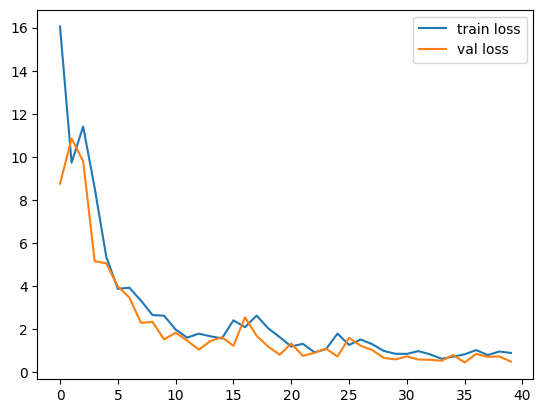

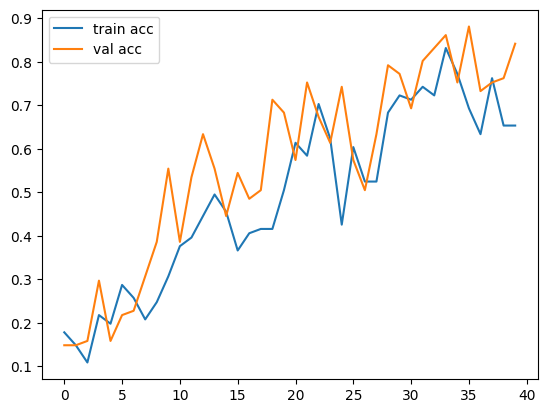

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
from tensorflow.keras.models import load_model

model.save('place_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
y_pred = model.predict(test_set)

4/4 [==============================] - 26s 5s/step


In [ ]:
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

y_pred = np.argmax(y_pred, axis=1)

In [ ]:
model=load_model('place_model.h5')

In [ ]:
img=image.load_img('/content/drive/MyDrive/Smart_Travel/tourist_places/Dalada maligawa/10.jpg',target_size=(size,size))

In [ ]:
x=image.img_to_array(img)
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[6.5991411e-04, 5.7877082e-02, 2.4613533e-02, 9.3556104e-05,
        1.5509346e-02, 4.2307544e-02, 2.1771455e-06, 1.4319803e-05,
        8.5448325e-01, 4.4392832e-03]], dtype=float32)

In [ ]:
np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 338ms/step


array([8])

In [ ]:
class_map = training_set.class_indices
classes = []
for key in class_map.keys():
    classes.append(key)

In [ ]:
classes

['Colombo Lighthouse',
 'Dalada maligawa',
 'Dondra Lighthouse',
 'Galle Fort Clock Tower',
 'Japanese Peace Pagoda, Unawatuna',
 "Kayman's Gate - Dutch Bell Tower",
 "King Sri Wickrama Rajasinghe's Prison Room",
 'Lighthouse - Galle',
 'Old Dutch Market Matara',
 'Star Fort Matara']

In [ ]:
def predict_image(filename, model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)
    prob = prediction
    print(prob[0])

    index = np.argmax(prediction)

    plt.title("Prediction - {}".format(str(classes[index]).title()), size=18, color='red')
    plt.imshow(img_array)



1/1 [==============================] - 0s 205ms/step
[3.9467640e-04 9.5373982e-01 2.8023467e-04 2.7378066e-04 3.1621210e-04
 4.0407903e-02 2.3880348e-04 4.7438015e-04 4.5285549e-05 3.8289644e-03]


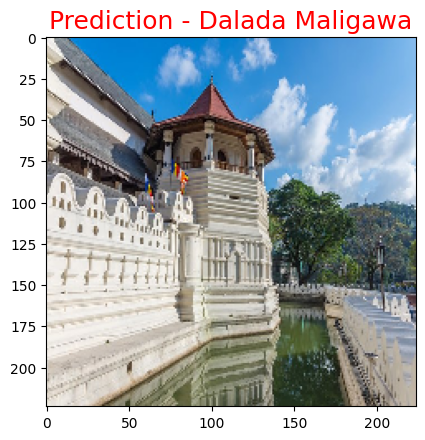

In [ ]:
predict_image('/content/drive/MyDrive/Smart_Travel/tourist_places/Dalada maligawa/22.jpg', model)


In [ ]:
!pip install flask-ngrok


In [ ]:
!pip install pyngrok
from pyngrok import ngrok


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 718.7/718.7 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyngrok: filename=pyngrok-7.0.0-py3-none-any.whl size=21129 sha256=9e0a0ffdadfa9942f759f6e62b8b8972ba07cc3ff719dfd6cba987e3a453d151
  Stored in directory: /root/.cache/pip/wheels/60/29/7b/f64332aa7e5e88fbd56d4002185ae22dcdc83b35b3d1c2cbf5
Successfully built pyngrok


In [ ]:
!ngrok authtoken 2XUsk64W9nRWQhfNdUXirBnMESE_uWPJjcYxv7YWaq5wtb3e


Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [ ]:
!pip install pyngrok

In [ ]:
pip install flask tensorflow numpy pillow


In [ ]:
pip install pandas


In [ ]:
from flask import Flask, request, jsonify, send_file, Response, send_from_directory
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
import os
import io
from werkzeug.utils import secure_filename
from PIL import Image
from pyngrok import ngrok
import pandas as pd  # Import pandas

app = Flask(__name__)
model = load_model('place_model.h5')  # Load your pre-trained model

# ... (previous code remains unchanged)
app = Flask(__name__)
model = load_model('place_model.h5')  # Load your pre-trained model

# Define classes
class_map = training_set.class_indices
classes = list(class_map.keys())

# Define the folder containing image and text files
data_folder = '/content/drive/MyDrive/Smart_Travel/tourist_places'

# Define an upload folder for storing the uploaded images
upload_folder = '/content/drive/MyDrive/Smart_Travel/tourist_location/uploads'
os.makedirs(upload_folder, exist_ok=True)

# Load the Excel file
excel_file_path = '/content/drive/MyDrive/Smart_Travel/tourist_location/location_details.xlsx'  # Replace with the actual path to your Excel file
df = pd.read_excel(excel_file_path)

# ... (previous code remains unchanged)

# Define allowed file extensions
ALLOWED_EXTENSIONS = {'png', 'jpg', 'jpeg'}

# Function to check the allowed file extensions
def allowed_file(filename):
    return '.' in filename and filename.rsplit('.', 1)[1].lower() in ALLOWED_EXTENSIONS


@app.route('/predict/detectlocation', methods=['POST'])
def predict():
    try:
        # Check if an image file is included in the request
        if 'image' not in request.files:
            return jsonify({'error': 'No image file provided'})

        image_file = request.files['image']

        # Check if the file has a valid extension
        if image_file and allowed_file(image_file.filename):
            filename = secure_filename(image_file.filename)
            image_path = os.path.join(upload_folder, filename)

            # Save the uploaded image to the upload folder
            image_file.save(image_path)

            img = Image.open(image_path)
            img = img.convert("RGB")
            img = img.resize((224, 224))  # Resize the image to match the model's input size
            img_array = np.asarray(img)
            img_processed = np.expand_dims(img_array, axis=0)
            img_processed = img_processed / 255.0

            prediction = model.predict(img_processed)
            predicted_class_index = np.argmax(prediction)
            predicted_class = classes[predicted_class_index]

            # Search for the location name in the Excel file
            location_data = df.loc[df['Name'] == predicted_class]

            if location_data.empty:
                return jsonify({'error': 'Location not found in the database'}), 404

            # Construct the response JSON
            response = {
                'prediction': predicted_class,
                 'Name': location_data['Name'].values[0],
                'Builtby': location_data['Built by'].values[0],
                'TimePeriod': location_data['TimePeriod'].values[0],
                'Religion': location_data['Religion'].values[0],
                'Description': location_data['description'].values[0],

            }

            return jsonify(response), 200

        else:
            return jsonify({'error': 'Invalid file extension'}), 400

    except Exception as e:
        return jsonify({'error': str(e)}), 500
# ... (remaining code remains unchanged)


if __name__ == '__main__':
    ngrok.set_auth_token('2XUsk64W9nRWQhfNdUXirBnMESE_uWPJjcYxv7YWaq5wtb3e')  # Replace 'your_auth_token' with your actual ngrok authentication token
    public_url = ngrok.connect(addr="127.0.0.1:5000")
    print(' * ngrok tunnel "{}" -> "http://127.0.0.1:5000"'.format(public_url))

    app.run()


 * ngrok tunnel "NgrokTunnel: "https://4109-35-236-188-1.ngrok-free.app" -> "http://127.0.0.1:5000"" -> "http://127.0.0.1:5000"
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


1/1 [==============================] - 1s 1s/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 02:44:41] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 215ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 02:45:16] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 342ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 02:45:38] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 257ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 02:46:40] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 334ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 02:46:53] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 207ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 02:47:32] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 204ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 02:47:43] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 220ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:30:52] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 214ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:40:21] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 229ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:40:39] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 214ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:44:38] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 209ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:44:49] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 228ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:45:26] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 319ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:47:01] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 211ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:48:48] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 204ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:49:35] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 343ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:50:26] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 211ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:52:07] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 224ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:52:47] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 205ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:54:59] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 210ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:55:49] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 342ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:56:08] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 210ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 03:59:20] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 211ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:04:45] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 221ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:05:48] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 203ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:06:34] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 207ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:09:08] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 204ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:18:07] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 208ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:18:47] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 216ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:19:53] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 344ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:21:15] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 213ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:23:21] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 212ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:34:55] "POST /predict/detectlocation HTTP/1.1" 200 -


1/1 [==============================] - 0s 209ms/step


INFO:werkzeug:127.0.0.1 - - [31/Oct/2023 04:36:08] "POST /predict/detectlocation HTTP/1.1" 200 -


In [ ]:
print(list(df.columns))